# ML Assginment for AI course

## Data Understanding

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import xgboost as xgb
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
room_count=df["bedrooms"].value_counts()


In [10]:
fontFamily = "Times New Roman"
labelsFontSize=12
titlesFontSize=14

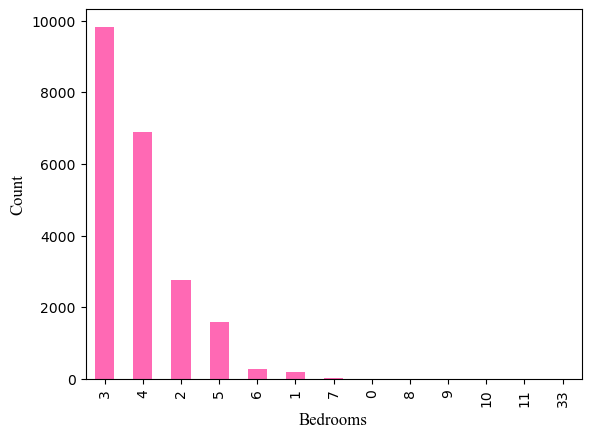

In [11]:
room_count.plot(kind="bar",color="hotpink")
plt.ylabel("Count",fontname=fontFamily ,fontsize=labelsFontSize)
plt.xlabel("Bedrooms",fontname=fontFamily,fontsize=labelsFontSize)
plt.show()

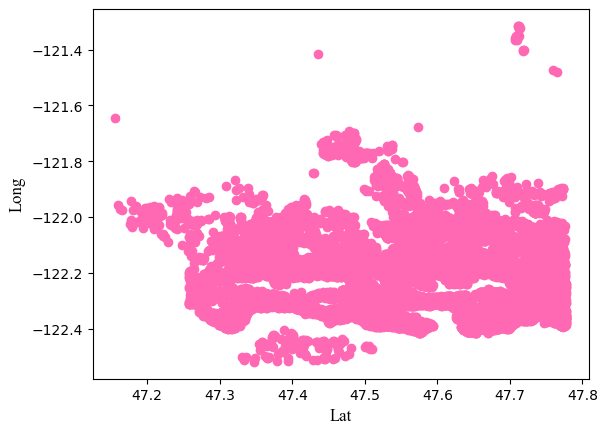

In [12]:
plt.scatter(df["lat"],df["long"],color="hotpink")
plt.xlabel("Lat",fontname = fontFamily , fontsize = labelsFontSize)
plt.ylabel("Long",fontname = fontFamily , fontsize = labelsFontSize)
plt.show()

In [13]:
def scatter_plt(column):
    plt.scatter(df["price"],df[column],color="hotpink")
    plt.xlabel("price", fontname = fontFamily , fontsize = labelsFontSize)
    plt.ylabel(column,fontname = fontFamily , fontsize = labelsFontSize)
    plt.title(f"Price vs. {column}" , fontname = fontFamily , fontsize = titlesFontSize)
    plt.show()

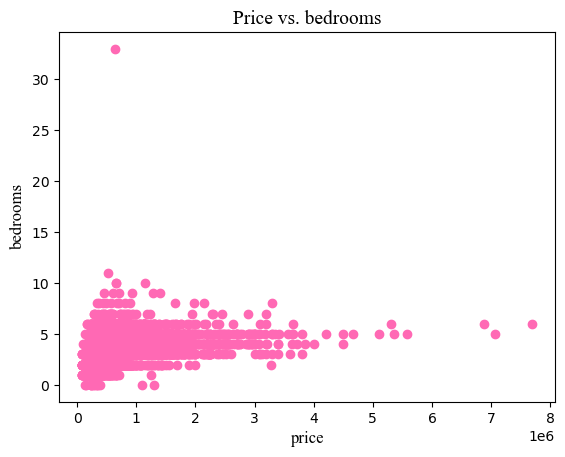

In [14]:
scatter_plt("bedrooms")

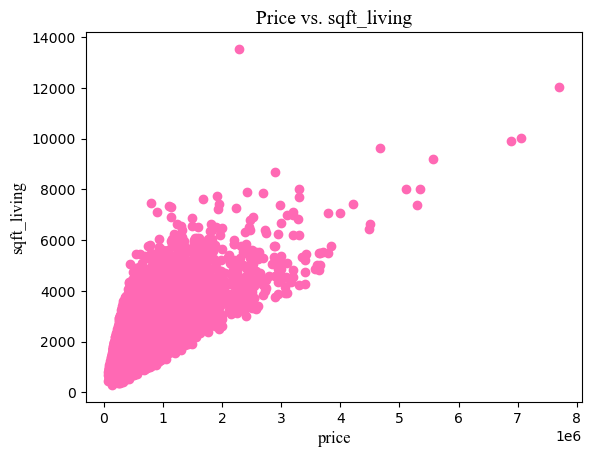

In [15]:
scatter_plt("sqft_living")

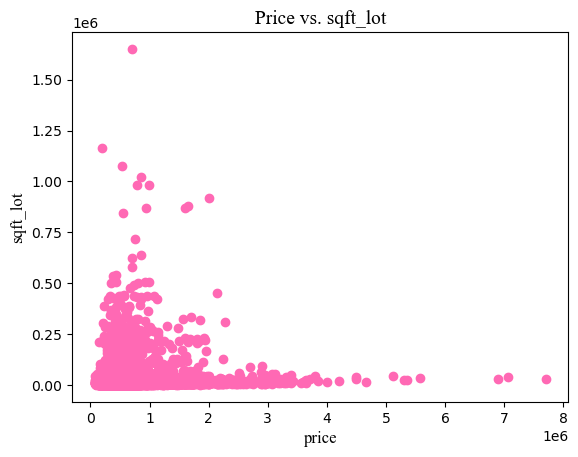

In [16]:
scatter_plt("sqft_lot")

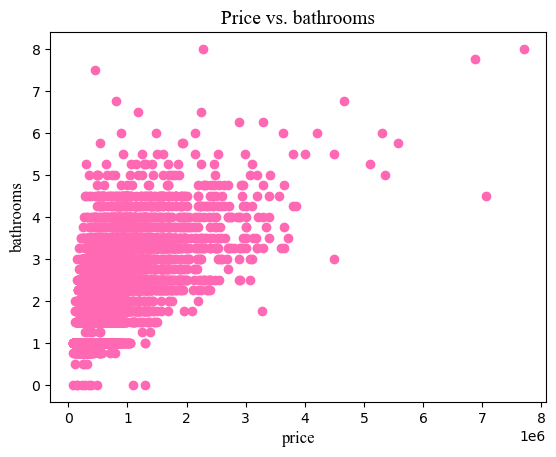

In [17]:
scatter_plt("bathrooms")

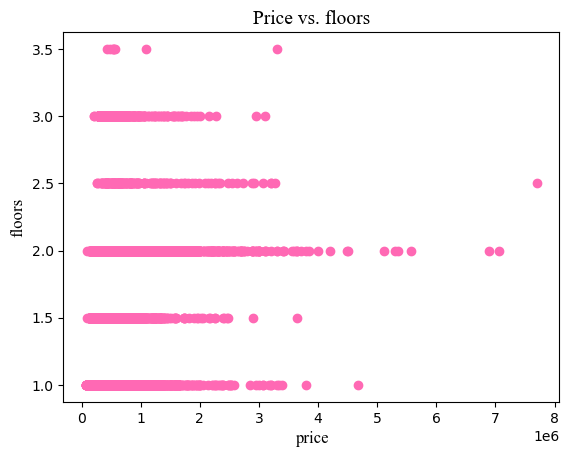

In [18]:
scatter_plt("floors")

In [19]:
def correlation(column):
    return df["price"].corr(df[column])

In [20]:
correlation("bedrooms")

0.3083495981456382

In [21]:
correlation("bathrooms")

0.5251375054139615

In [22]:
correlation("sqft_living")

0.7020350546118004

In [23]:
correlation("sqft_lot")

0.08966086058710013

In [24]:
correlation("floors")

0.25679388755071847

## Train and Test

In [25]:
columns=["bedrooms","bathrooms","sqft_living","sqft_lot","floors","price"]

In [26]:
df_predection=df.loc[:,columns]

In [27]:
df_predection

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,360000.0
21609,4,2.50,2310,5813,2.0,400000.0
21610,2,0.75,1020,1350,2.0,402101.0
21611,3,2.50,1600,2388,2.0,400000.0


In [28]:
df_predection.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

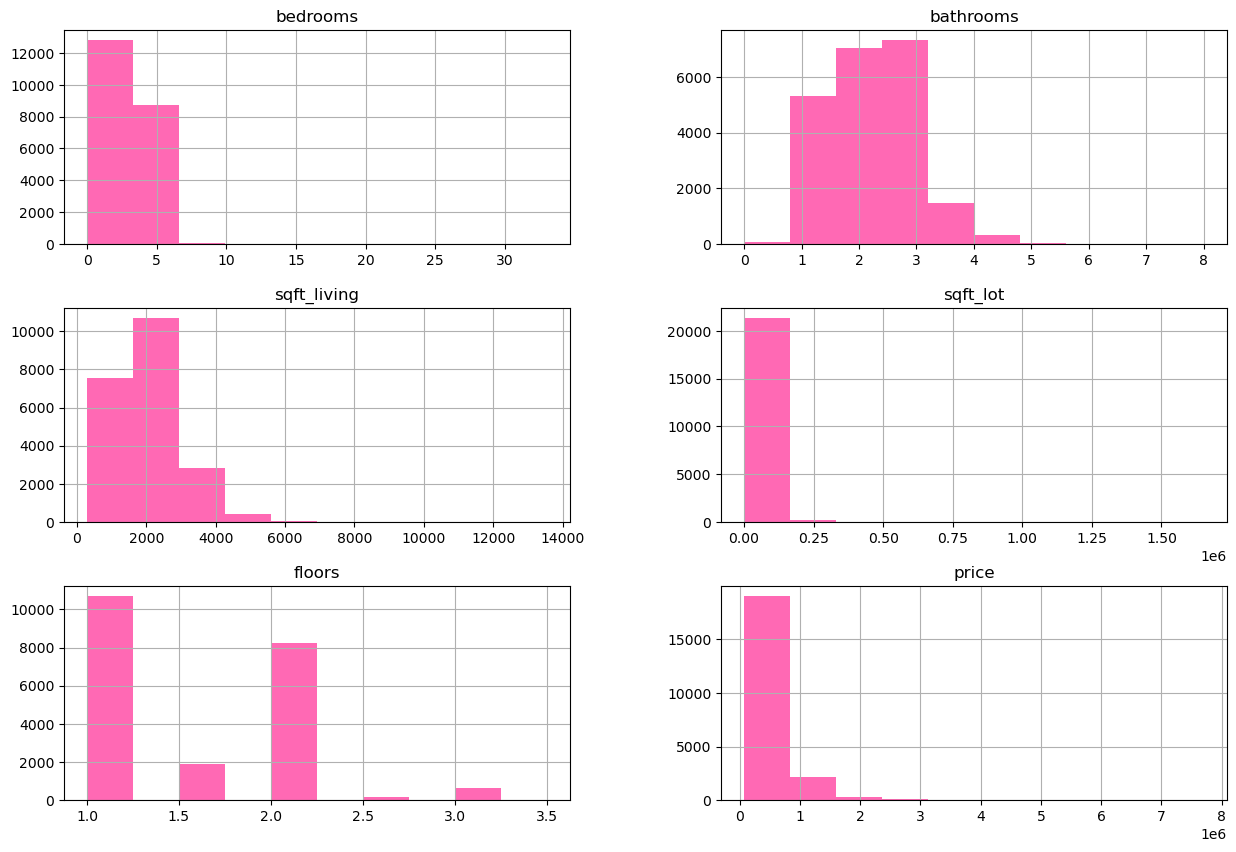

In [29]:
df_predection.hist(figsize=(15,10),color="hotpink")

<Axes: >

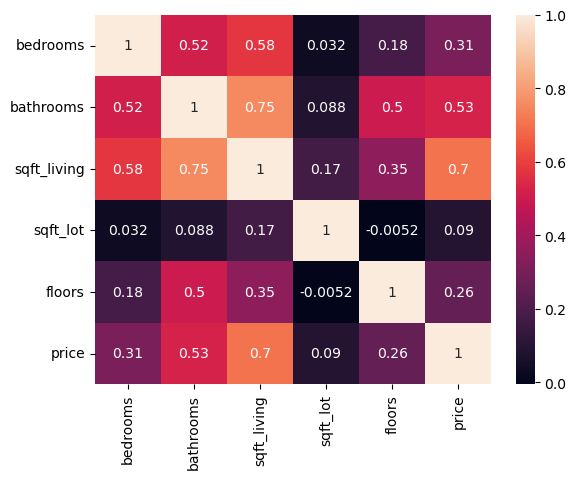

In [30]:
sns.heatmap(df_predection.corr(),annot=True)

### Arrange data into "Features" and "Target"

In [31]:
features=["bedrooms","bathrooms","sqft_living","sqft_lot","floors"]

In [32]:
X = df_predection.loc[:,features]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3,1.00,1180,5650,1.0
1,3,2.25,2570,7242,2.0
2,2,1.00,770,10000,1.0
3,4,3.00,1960,5000,1.0
4,3,2.00,1680,8080,1.0
...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0
21609,4,2.50,2310,5813,2.0
21610,2,0.75,1020,1350,2.0
21611,3,2.50,1600,2388,2.0


In [33]:
y = df_predection.loc[:,["price"]]
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0 )

In [35]:
X.shape

(21613, 5)

In [36]:
y.shape

(21613, 1)

In [37]:
X_train.shape

(16209, 5)

In [38]:
X_test.shape

(5404, 5)

In [39]:
y_train.shape

(16209, 1)

In [40]:
y_test.shape

(5404, 1)

### Make an instance of DecisionTreeRegressor

In [41]:
reg = DecisionTreeRegressor(max_depth = 5, random_state = 0)

### Train the model on the data

In [42]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

### Predict labels on unseen test data using DecisionTreeRegressor

In [43]:
# predict multiple observations/houses
reg.predict(X_test[0:10])

array([ 417038.32831325, 1016098.95714286,  417038.32831325,
        417038.32831325,  739397.58833333,  474303.437014  ,
        393266.79097299,  555258.34883721,  555258.34883721,
       1342344.828125  ])

In [44]:
# prdict one observation/house
reg.predict(X_test.iloc[0].values.reshape(1,-1))

C:\Users\DELL G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([417038.32831325])

###  Evaluate the results using different evaluation metrics

In [45]:
#R^2
r2_DesReg = reg.score(X_test, y_test)
r2_DesReg

0.5558073822490773

In [46]:
y_predict = reg.predict(X_test)

In [47]:
#mean_squared_error
mean_squared_DesReg = mean_squared_error (y_test,y_predict)
mean_squared_DesReg

59006808469.74107

In [48]:
#mean_absolute_error
mean_abs_DesReg = mean_absolute_error (y_test,y_predict)
mean_abs_DesReg

159699.5412733098

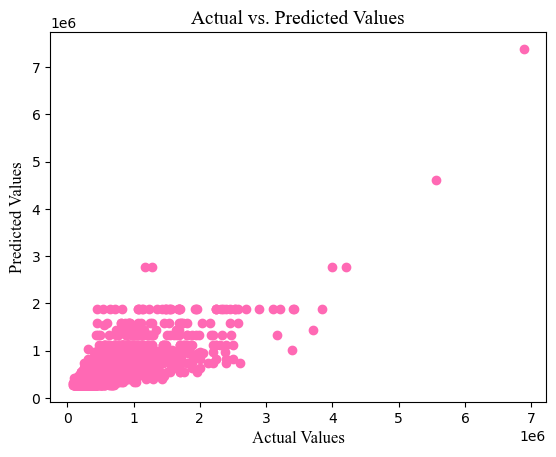

In [49]:
plt.scatter(y_test, y_predict,color="hotpink")
plt.xlabel("Actual Values",fontname="Times New Roman", fontsize=12)
plt.ylabel("Predicted Values",fontname="Times New Roman",fontsize=12)
plt.title("Actual vs. Predicted Values", fontname="Times New Roman" ,fontsize=14)
plt.show()

## Plot the Decision Tree

In [50]:
# max_depth=2
reg_2 = DecisionTreeRegressor(max_depth = 2, random_state = 0)
reg_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

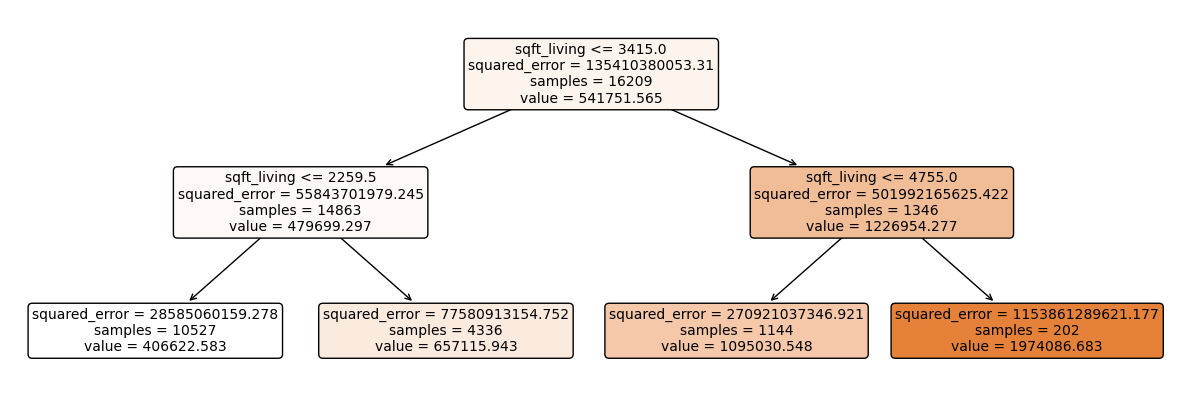

In [51]:
plt.figure(figsize=(15, 5))
plot_tree(reg_2, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

### Predict labels on unseen test data using XGBRegressor

In [52]:
xg_reg = xgb.XGBRegressor(max_depth=5, random_state=0)

In [53]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [54]:
y_pred = xg_reg.predict(X_test)

In [55]:
xg_reg.predict(X_test[0:10])

array([ 435814.25,  996494.7 ,  469985.84,  417881.8 ,  689574.94,
        356917.53,  384925.25,  589488.8 ,  546086.44, 1519243.9 ],
      dtype=float32)

In [56]:
xg_reg.predict(X_test.iloc[0].values.reshape(1,-1))

array([435814.25], dtype=float32)

<Figure size 1000x600 with 0 Axes>

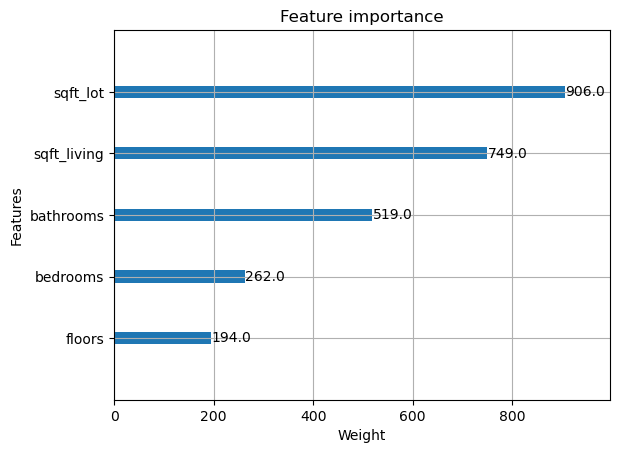

In [57]:
#show the importance of each attribute
plt.figure(figsize=(10, 6))
xgb.plot_importance(xg_reg, importance_type='weight', xlabel='Weight')
plt.show()

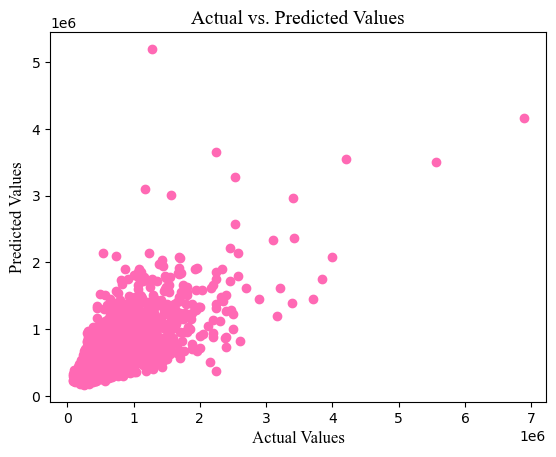

In [58]:
plt.scatter(y_test, y_pred,color="hotpink")
plt.xlabel("Actual Values",fontname="Times New Roman", fontsize=12)
plt.ylabel("Predicted Values",fontname="Times New Roman",fontsize=12)
plt.title("Actual vs. Predicted Values", fontname="Times New Roman" ,fontsize=14)
plt.show()

###  Evaluate the results using different evaluation metrics

In [59]:
#mean_squared_error
mean_squared_xgb = mean_squared_error (y_test,y_pred)
mean_squared_xgb

58863436630.214516

In [60]:
#mean_abolute_error
mean_abs_xgb = mean_absolute_error(y_test, y_pred)
mean_abs_xgb

150507.71617667467

In [61]:
#R^2
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.5568866596132094